In [1]:
import pandas as pd 
import numpy as np 

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url,header = None)



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x, y = wine.iloc[:,1:].values, wine.iloc[:,0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                test_size = 0.3,
                                                random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [39]:
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [40]:

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])for i in range(len(eigen_vals))]

eigen_pairs.sort(key=lambda k: k[0], reverse=True)

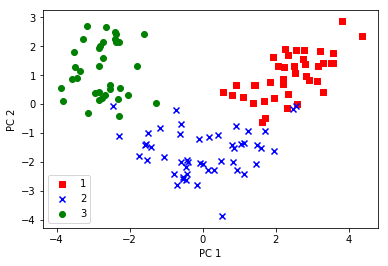

In [48]:
import matplotlib.pyplot as plt
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis] ))

x_train_pca = x_train_std.dot(w)

colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train==l, 0], 
              x_train_pca[y_train==l, 1], 
               c=c, label=l, marker=m) 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()